# 🎯👁️ Object Detection -Using YOLO

In [3]:
# pip install ultralytics

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/akashs/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
# 🔹 Load pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")

100%|██████████████████████████████████████| 6.25M/6.25M [00:01<00:00, 4.88MB/s]


In [10]:
!ls '/media/akashs/FA22E72622E6E69B/DATA1_disk/ACADEMICS/3_IPCS_Works/data/yolo/'

classroom.jpg  face.jpg  ship.jpg  traffic.jpg


In [11]:
image_path = '/media/akashs/FA22E72622E6E69B/DATA1_disk/ACADEMICS/3_IPCS_Works/data/yolo/ship.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [13]:
results = model(img_rgb)

/home/akashs/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0



0: 384x640 3 boats, 175.2ms
Speed: 7.0ms preprocess, 175.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


In [14]:
# 🔹 Extract results
boxes = results[0].boxes
names = model.names  # COCO class names

In [15]:
# 🔹 Draw results on the image
for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])  # bounding box
    conf = box.conf[0].item()
    cls = int(box.cls[0].item())
    label = f"{names[cls]}: {conf:.2f}"

    # Draw rectangle and label
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(img_rgb, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                0.6, (255, 0, 0), 2)

    print(f"🟢 Detected: {label} at ({x1}, {y1}, {x2}, {y2})")

🟢 Detected: boat: 0.75 at (117, 155, 1435, 682)
🟢 Detected: boat: 0.36 at (173, 284, 1446, 666)
🟢 Detected: boat: 0.26 at (985, 183, 1105, 288)


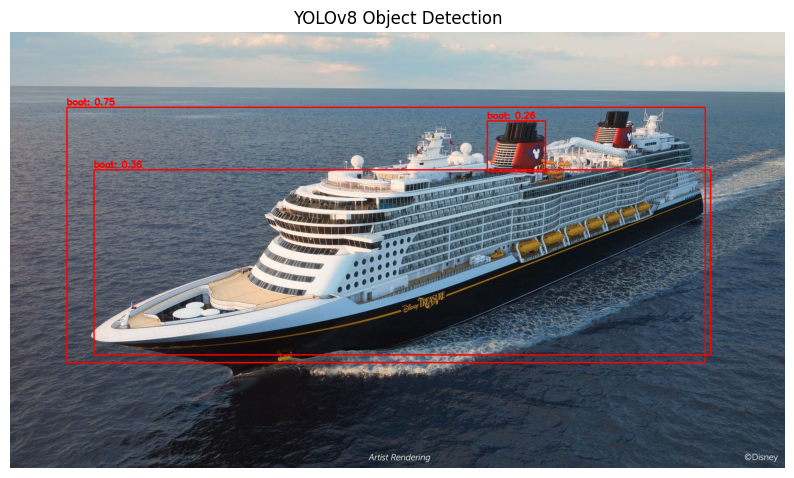

In [16]:
# 🔹 Show final image
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("YOLOv8 Object Detection")
plt.show()